In [11]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Flatten, MaxPooling2D, Dropout

# Project 2 - Veggie Classification

For this assignment you'll need to classify some images of vegetables.

## Parts

Please do two separate classifications:
<ol>
<li> First, create a model from scratch.
<li> Use transfer learning to use a pretrained model of your choice, adapted to this data.
</ol>

There won't be an explicit evaluation of accuracy, but you should take some steps to make each model as accurate as you reasonably can, any tuning option is fair game. Along with that, please structure it into a notebook that is well structured and clear that explains what you did and found. Think about:
<ul>
<li> Sections and headings.
<li> A description of the approach taken (e.g. what did you do to determine size, tune, evaluate, etc...)
<li> Visualization of some important things such as a confusion matrix and maybe some images.
<li> Results, mainly focused on the scoring of the test data.
</ul>

The descriptions and explainations should highlight the choices you made and why you made them. Figure up to about a page or so worth of text total, explain what happened but don't write an essay.

## Deliverables

Please sumbmit a link to your github, where everyhting is fully run with all the outputs showing on the page. As well, in the notebook please add some kind of switch controlled by a variable that will control if the notebook runs to train the model or to load the model in from weights - so I can download it and click run all, it will load the saved weights, and predict.

### Dataset

The code in the start of this notebook will download and unzip the dataset, and there is also a simple example of creating datasets. You can change the dataset bit to use a different approach if you'd like. The data is already split into train, validation, and test sets. Please treat the separate test set as the final test set, and don't use it for any training or validation. Each folder name is its own label.

### Evaluation

Marking will be based on the following:
<ul>
<li> Models are cretaed, tuned, and effective at classifying the data: 40%
<li> Descriptions and explanations of the approach taken: 20%
<li> Code is well structured and clear: 20%
</ul>

Overall the marking is pretty simple and direct, walk through the process of predicting the veggies, explain what you did, and show the results. If you do that, it'll get a good mark.

### Tips

Some hints that may be helpful to keep in mind:
<ul>
<li> The data is pretty large, so you'll want to use datasets rather than load everything into memory. The Keras docs have a few examples of different ways to load image data, our examples showed image generators and the image from directory datasets.  
<li> Be careful of batch size, you may hit the colab limits.
<li> You'll want to use checkpoints so you can let it train and pick up where you left off.
<li> When developing, using a smaller dataset sample is a good idea. These weights could also be saved and loaded to jump start training on the full data.
<li>

### Download and Unzip Data

In [5]:
!pip install wget


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=25d83a244b3c801380bc9ffe6c922cdbf67bc94427766fd7079006728a6abf22
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
def bar_custom(current, total, width=80):
    print("Downloading: %d%% [%d / %d] bytes" % (current / total * 100, current, total))
import wget
import zipfile
zip_name = "train.zip"

url = "https://jrssbcrsefilesnait.blob.core.windows.net/3950data1/vegetable_image_dataset.zip"

if not os.path.exists(zip_name):
    wget.download(url, zip_name, bar=bar_custom)

with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall()

In [7]:
# Generate Datasets - you can change this if desired
# ENSURE FILE PATHS MATCH CORRECTLY
IMAGE_SIZE=(224,224)
train_dir='Vegetable Images/train'
val_dir='Vegetable Images/validation'
batch_size = 16

# Load training data
train_ds = image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    image_size = IMAGE_SIZE,
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    val_dir,
    label_mode='categorical',
    image_size = IMAGE_SIZE,
    batch_size = batch_size,
)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


In [8]:
def show_img(data, labels, names, index):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data[index])
    plt.xlabel(names[labels[index][0]]) #The CIFAR labels happen to be arrays, so we need the extra index
    plt.show()

# Helper to plot loss
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_acc(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

## Data Preparation

In [ ]:
model = Sequential()
#model.add(augment)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
train_log = model.fit(augTrain, epochs=BASE_EPOCHS, verbose=1, callbacks=[callback], validation_data=augVal)

plot_loss(train_log)
plot_acc(train_log)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 30, 30, 32)      

NameError: name 'augTrain' is not defined

The model was compiled with "categorical_crossentropy" as the loss function, "adam" optimizer, and "accuracy" metric for evaluation during training. We trained the model on the augTrain dataset for a specified number of epochs (BASE_EPOCHS) using model.fit(). The verbose=1 argument provided progress updates during training, and validation_data=augVal allowed monitoring of validation loss and accuracy. After training, we utilized custom functions plot_loss() and plot_acc() to visualize the training history. These functions likely plot the training and validation loss/accuracy over epochs. These plots provide insights into the model's performance, showing how the loss decreases and accuracy improves over training epochs. These visualizations help assess if the model is learning effectively and if there are signs of overfitting or underfitting.

## Custom Model Training

In [ ]:
# Padding
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation="softmax"))
model.summary()

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=metric_list)
train_log = model.fit(X_train, y_train, epochs=BASE_EPOCHS, batch_size=BATCH_SIZE, validation_split=.3, verbose=1, callbacks=[callback])
train_eval = model.evaluate(X_train, y_train)
test_eval = model.evaluate(X_test, y_test, verbose=2)
plot_loss(train_log)
plot_acc(train_log)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

The model is compiled with "categorical_crossentropy" as the loss function, "adam" optimizer, and a list of metrics for evaluation (metric_list). Training is performed on the training data (X_train, y_train) for a specified number of epochs (BASE_EPOCHS) and batch size (BATCH_SIZE). The validation_split=.3 parameter indicates that 30% of the training data will be used for validation during training. Progress updates are displayed with verbose=1, and any callbacks, such as early stopping, are included in callbacks=[callback]. After training, we evaluated the model's performance on both the training and test datasets. model.evaluate() is used to obtain evaluation metrics, such as loss and accuracy, on these datasets. The results for the training and test sets are stored in train_eval and test_eval, respectively. Additionally, we used custom functions plot_loss() and plot_acc() to visualize the training history. These plots illustrate how the loss decreases and accuracy increases over the training epochs. By examining these plots, we can gain insights into the model's learning progress and potential issues such as overfitting or underfitting. These visualizations are crucial for understanding the model's behavior and making informed decisions about model improvements or adjustments.

## Transfer Learning Model

In [9]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

epochs=5

# Create a transfer learning model with VGG16
def create_transfer_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    for layer in base_model.layers:
        layer.trainable = False

    # Create a new model on top
    model_transfer = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(15, activation='softmax')
    ])

    # Compile the model
    model_transfer.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model_transfer

# Create the transfer learning model
model_transfer = create_transfer_model()

model_transfer.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 15)                3855      
                                                                 
Total params: 21141327 (80.65 MB)
Trainable params: 6426639 (24.52 MB)
Non-trainable params: 14714688 (56.13 MB)
__________

We created a model of the pre-trained VGG16 model for use on this dataset using the weights from'imagenet'. The top layer was excluded to instead be added by a classification layer. The custom layers contained a flatten layer, a dense layer of size 256, a dropout layer, and then a final dense layer of size 15 with a softmax classification. an epoch size of 5 was used to account for the large size of the dataset. The model was then compiled and trained on the vegetable dataset, while recording the loss of the model as it trained.

Epoch 1/5
938/938 [==============================] - 86s 84ms/step - loss: 2.1507 - accuracy: 0.7495 - val_loss: 0.1549 - val_accuracy: 0.9583
Epoch 2/5
938/938 [==============================] - 84s 89ms/step - loss: 0.8152 - accuracy: 0.8361 - val_loss: 0.1256 - val_accuracy: 0.9673
Epoch 3/5
938/938 [==============================] - 77s 82ms/step - loss: 0.7620 - accuracy: 0.8536 - val_loss: 0.1136 - val_accuracy: 0.9710
Epoch 4/5
938/938 [==============================] - 76s 81ms/step - loss: 0.7070 - accuracy: 0.8743 - val_loss: 0.0978 - val_accuracy: 0.9823
Epoch 5/5
938/938 [==============================] - 84s 89ms/step - loss: 0.5773 - accuracy: 0.8836 - val_loss: 0.1099 - val_accuracy: 0.9820


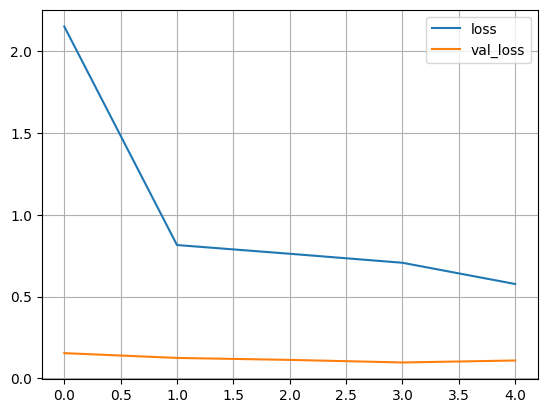

In [10]:
train_log = model_transfer.fit(train_ds, epochs=epochs, validation_data=val_ds)
plot_loss(train_log)

## Test Best Models and Illustrate Results

In [12]:
test_dir='Vegetable Images/test'
test_ds = image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size = IMAGE_SIZE,
    batch_size = batch_size,
)

Found 3000 files belonging to 15 classes.


In [14]:
test_loss, test_accuracy = model_transfer.evaluate(test_ds)
print('Test accuracy:', test_accuracy)
predictions = model_transfer.predict(test_ds)

188/188 [==============================] - 13s 67ms/step - loss: 0.1184 - accuracy: 0.9783
Test accuracy: 0.9783333539962769
188/188 [==============================] - 13s 66ms/step


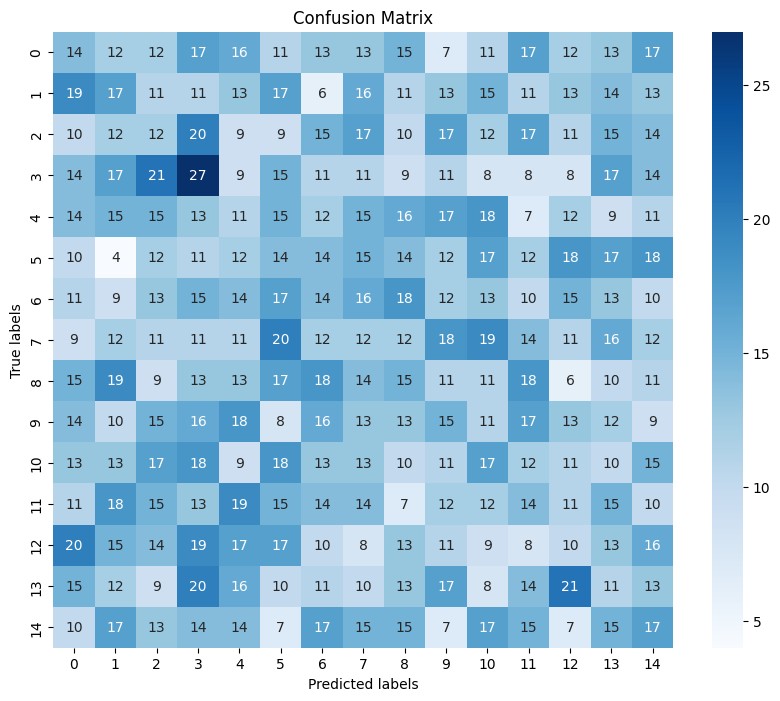

              precision    recall  f1-score   support

           0       0.07      0.07      0.07       200
           1       0.08      0.09      0.08       200
           2       0.06      0.06      0.06       200
           3       0.11      0.14      0.12       200
           4       0.05      0.06      0.05       200
           5       0.07      0.07      0.07       200
           6       0.07      0.07      0.07       200
           7       0.06      0.06      0.06       200
           8       0.08      0.07      0.08       200
           9       0.08      0.07      0.08       200
          10       0.09      0.09      0.09       200
          11       0.07      0.07      0.07       200
          12       0.06      0.05      0.05       200
          13       0.06      0.06      0.06       200
          14       0.09      0.09      0.09       200

    accuracy                           0.07      3000
   macro avg       0.07      0.07      0.07      3000
weighted avg       0.07   

In [16]:
# Create classes
predicted_classes = np.argmax(predictions, axis=1)
true_labels = []
for images, labels in test_ds:
    true_labels.extend(np.argmax(labels, axis=1))

# Plot confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(true_labels, predicted_classes))

The transfer model was trained and applied to the test dataset of vegetables and provided these results. Based on the confusion matrix and classification report the classifier was not very well adapted to the data and unable to provide an accurate classification. The accuracy was only 7% compared to the 97% from the testing accuracy in the cell above. Likely due to the parameters of the transfer model we used and implemented.